In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ecg_mit_train = pd.read_csv("mitbih_train.csv",header=None)
ecg_mit_test = pd.read_csv("mitbih_test.csv",header=None)
ecg_ptb_normal = pd.read_csv("ptbdb_normal.csv",header=None)
ecg_ptb_abnormal = pd.read_csv("ptbdb_abnormal.csv",header=None)

In [3]:
print("Shape of MIT ECG Dataset (Train): ",ecg_mit_train.shape)
print("Shape of MIT ECG Dataset (Test): ",ecg_mit_test.shape)

Shape of MIT ECG Dataset (Train):  (87554, 188)
Shape of MIT ECG Dataset (Test):  (21892, 188)


In [4]:
print("Shape of PTB ECG Dataset (Normal): ",ecg_ptb_normal.shape)
print("Shape of PTB ECG Dataset (Abnormal): ",ecg_ptb_abnormal.shape)

Shape of PTB ECG Dataset (Normal):  (4046, 188)
Shape of PTB ECG Dataset (Abnormal):  (10506, 188)


In [5]:
ecg_mit_train[187].value_counts()

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

In [6]:
ecg_mit_test[187].value_counts()

187
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64

In [7]:
ecg_ptb_normal[187].value_counts()

187
0.0    4046
Name: count, dtype: int64

In [8]:
ecg_ptb_abnormal[187].value_counts()

187
1.0    10506
Name: count, dtype: int64

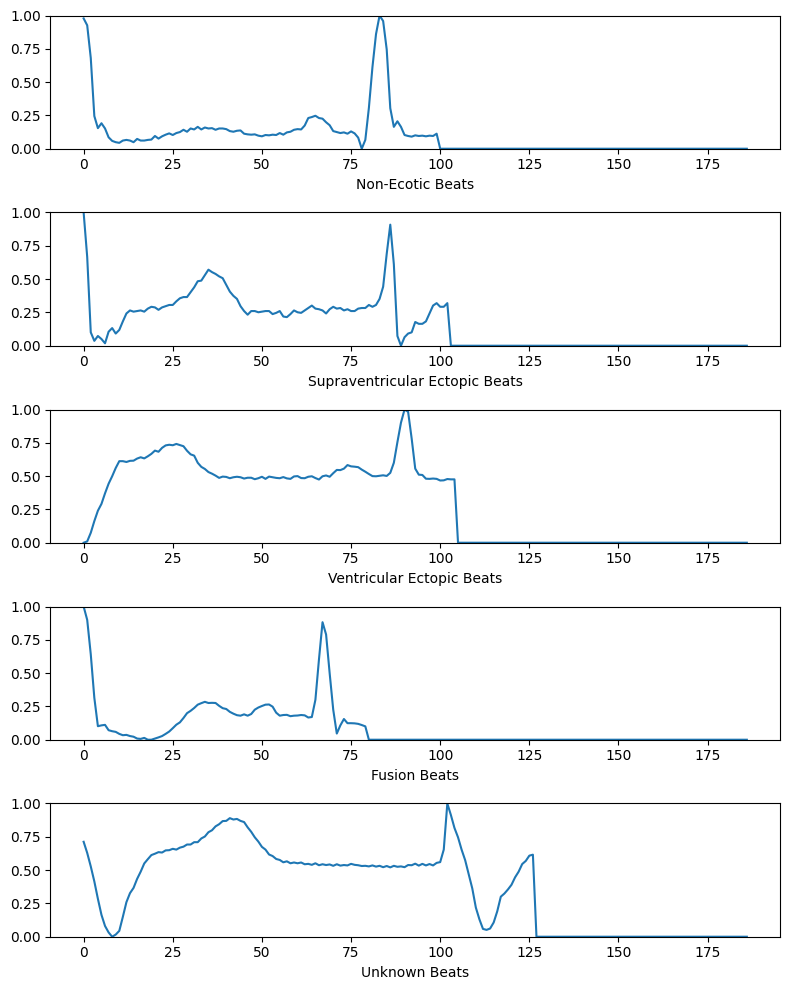

In [9]:
fig, axs = plt.subplots(5, 1, figsize=(8, 10))

labels = ["Non-Ecotic Beats", "Supraventricular Ectopic Beats", "Ventricular Ectopic Beats", "Fusion Beats", "Unknown Beats"]
indices = [0, 72471, 74694, 80482, 81123]
categories = [0.0, 1.0, 2.0, 3.0, 4.0]

for i in range(5):
    category_df = ecg_mit_train[ecg_mit_train[187] == categories[i]]
    if indices[i] in category_df.index:
        axs[i].plot(category_df.loc[indices[i]].drop(187))  
        axs[i].set_xlabel(labels[i])
        axs[i].set_ylim(ecg_mit_train.drop(187, axis=1).values.min(), 
                        ecg_mit_train.drop(187, axis=1).values.max())  

plt.tight_layout()
plt.show()

In [76]:
ecg_mit_train[187]=ecg_mit_train[187].astype(int)
ecg_mit_test[187]=ecg_mit_test[187].astype(int)
ecg_ptb_abnormal[187]=ecg_ptb_abnormal[187].astype(int)
ecg_ptb_normal[187]=ecg_ptb_normal[187].astype(int)

In [24]:
ecg_mit_train[187]=ecg_mit_train[187].astype(int)
beat_type_counts=ecg_mit_train[187].value_counts()
print(beat_type_counts)

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64


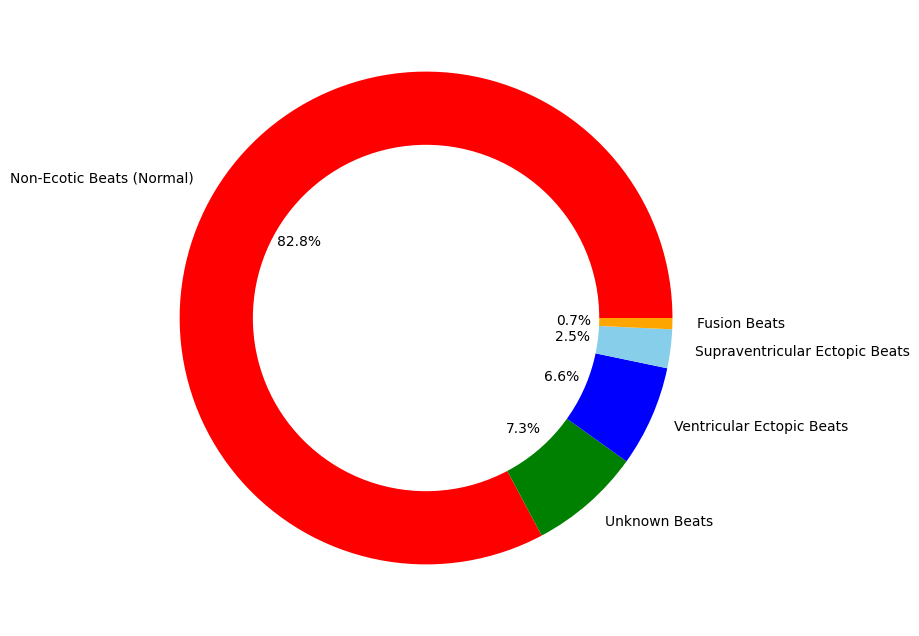

In [28]:
plt.figure(figsize=(15,8))
viz_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(beat_type_counts, labels=['Non-Ecotic Beats (Normal)','Unknown Beats','Ventricular Ectopic Beats','Supraventricular Ectopic Beats','Fusion Beats'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(viz_circle)
plt.show()

In [33]:
ecg_mit_train.iloc[0]

0      0.977941
1      0.926471
2      0.681373
3      0.245098
4      0.154412
         ...   
183    0.000000
184    0.000000
185    0.000000
186    0.000000
187    0.000000
Name: 0, Length: 188, dtype: float64

In [37]:
ecg_mit_train[187][0]

0

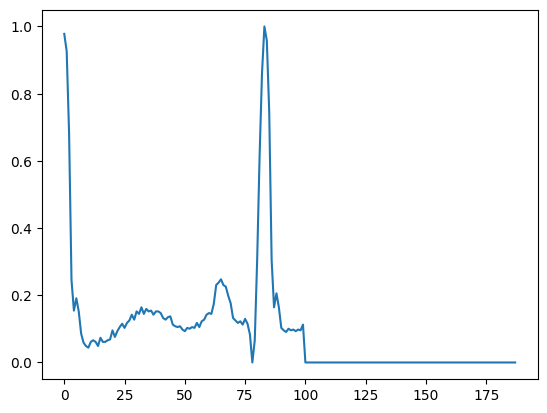

In [39]:
plt.plot(ecg_mit_train.iloc[0])

In [101]:
def beat_plotter(df,i):
    df_name = [name for name in globals() if globals()[name] is df][0]
    if df_name == "ecg_mit_train":
        type_of_beat = ""
        if df[187][i] == 0:
            type_of_beat = "Non-Ecotic Beats (Normal)"
        elif df[187][i] == 1:
            type_of_beat = "Supraventricular Ectopic Beats"
        elif df[187][i] == 2:
            type_of_beat = "Ventricular Ectopic Beats"
        elif df[187][i] == 3:
            type_of_beat = "Fusion Beats"
        else:
            type_of_beat = "Unknown Beats"
    elif df_name == "ecg_mit_test":
        type_of_beat = ""
        if df[187][i] == 0:
            type_of_beat = "Non-Ecotic Beats (Normal)"
        elif df[187][i] == 1:
            type_of_beat = "Supraventricular Ectopic Beats"
        elif df[187][i] == 2:
            type_of_beat = "Ventricular Ectopic Beats"
        elif df[187][i] == 3:
            type_of_beat = "Fusion Beats"
        else:
            type_of_beat = "Unknown Beats"
    elif df_name == "ecg_ptb_abnormal":
        type_of_beat = "Abnormal Class"
    else:
        type_of_beat = "Normal Class"
           
    plt.figure(figsize=(8, 2))
    plt.plot(df.iloc[i][0:180],label=type_of_beat)
    plt.xlabel("Time (in seconds)")
    plt.ylabel("Voltage (in mV)")
    plt.title(f"ECG Plot for {i}th row from {df_name} dataset")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()    

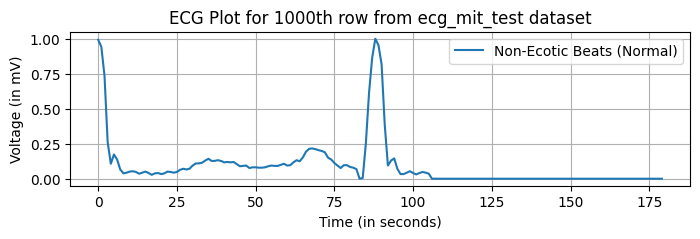

In [102]:
beat_plotter(ecg_mit_test,1000)

In [103]:
def sample_and_plot(df):
    sampled_indices = []
    
    for label in range(5):
        label_indices = df[df[187] == label].index  
        sampled = np.random.choice(label_indices, size=5, replace=False)  
        sampled_indices.extend(sampled)
        
    for i in sampled_indices:
        beat_plotter(df, i)

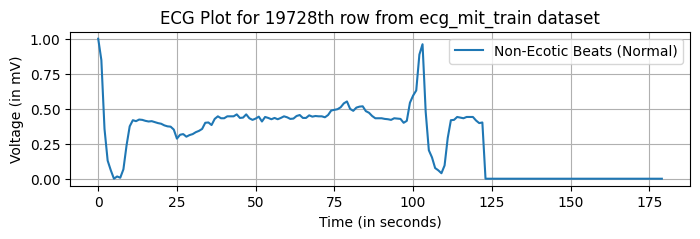

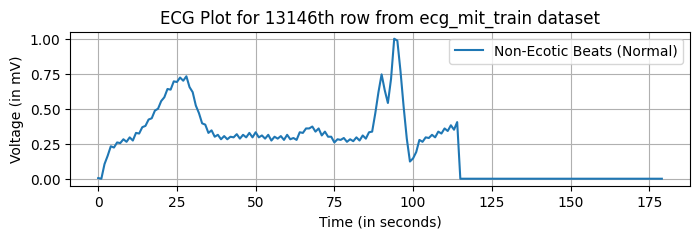

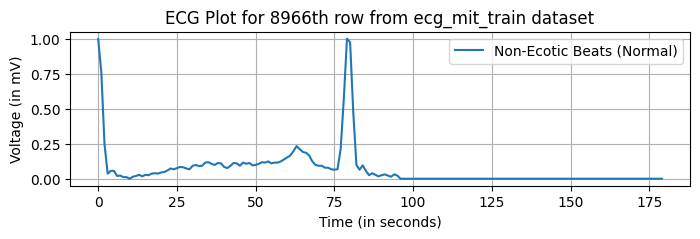

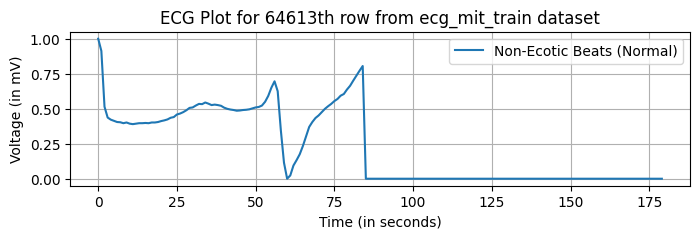

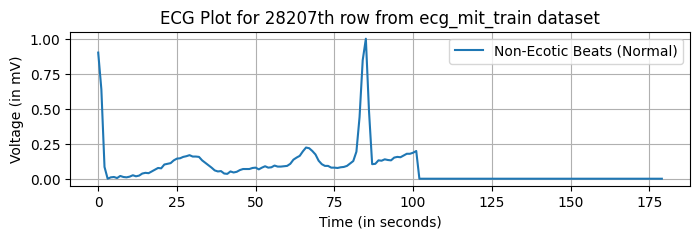

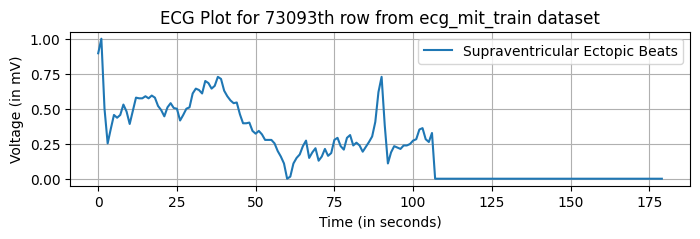

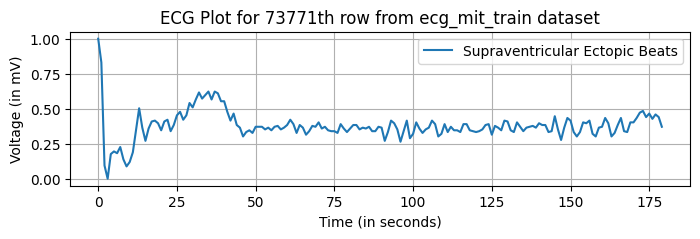

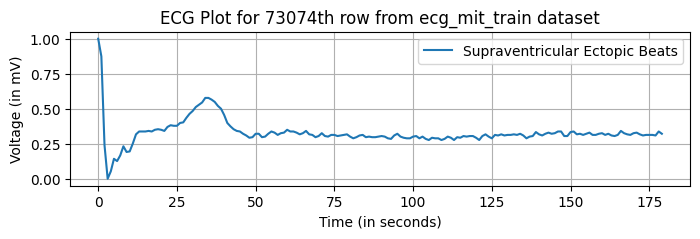

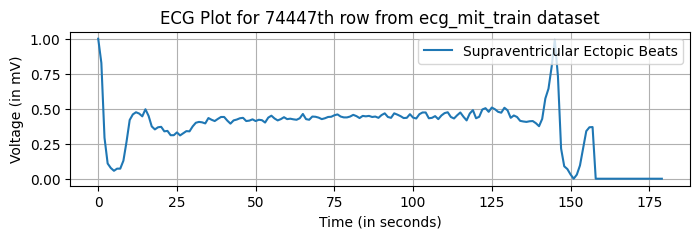

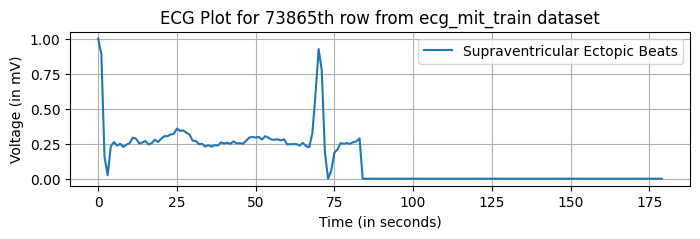

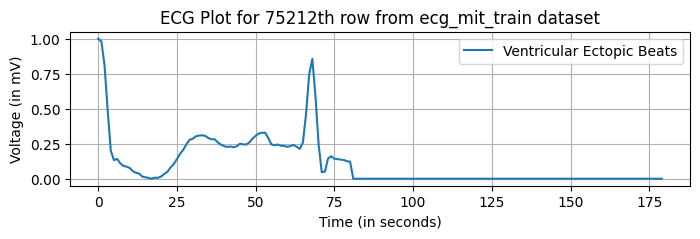

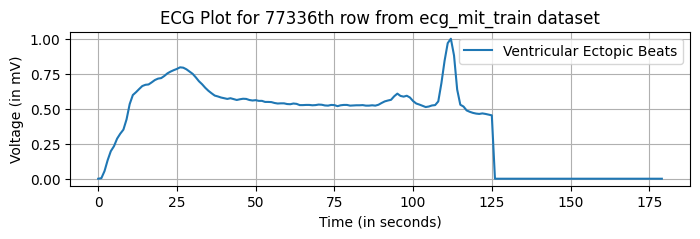

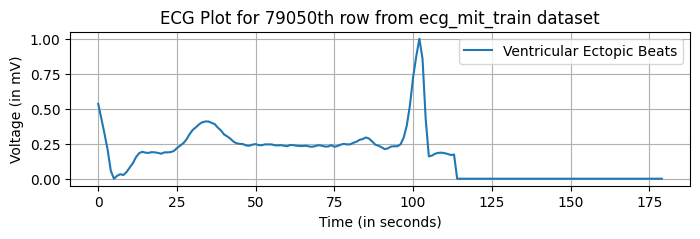

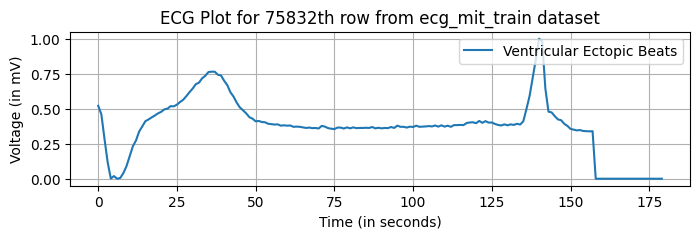

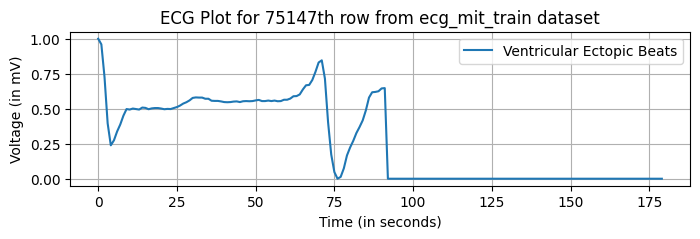

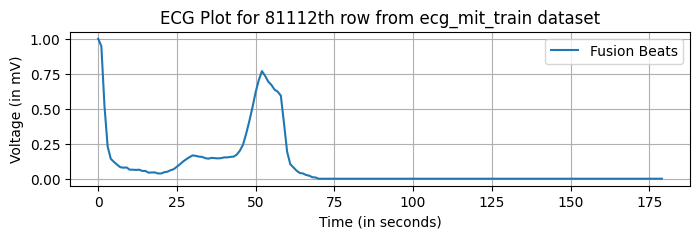

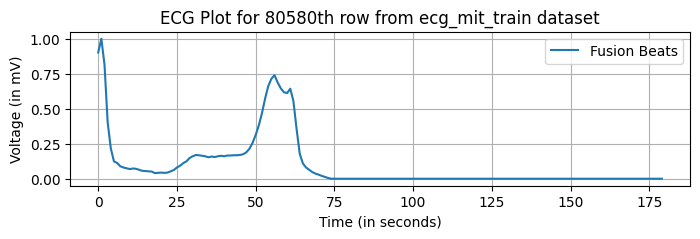

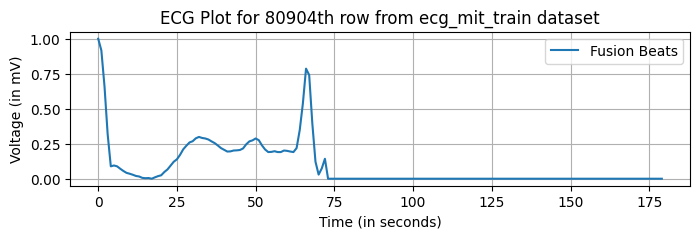

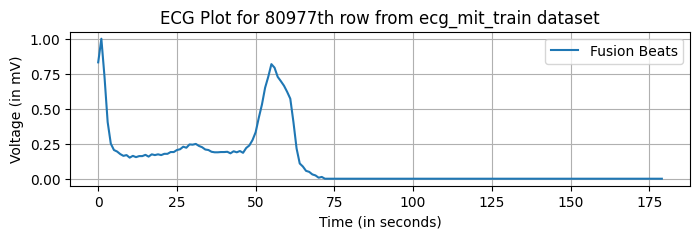

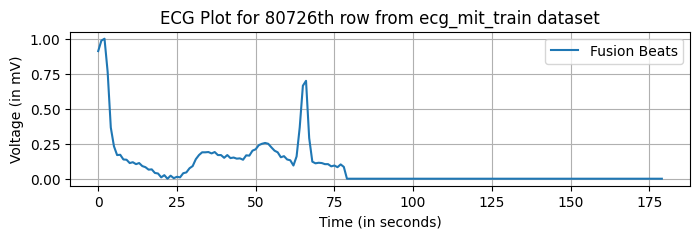

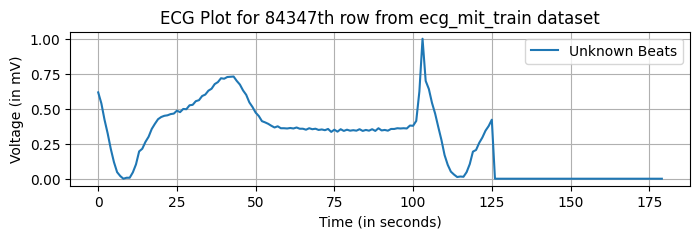

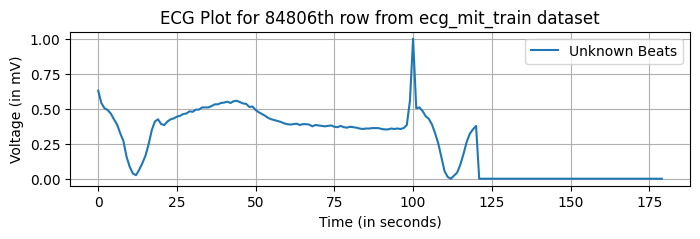

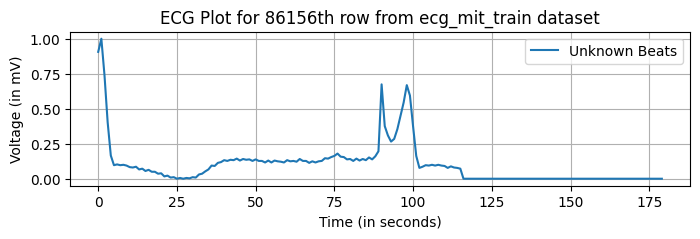

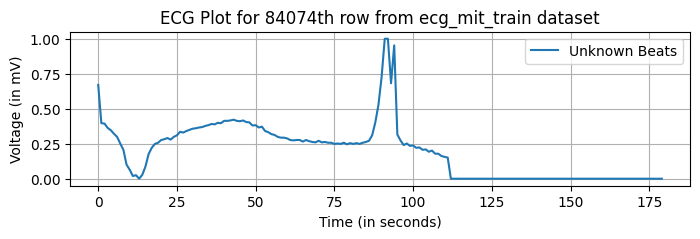

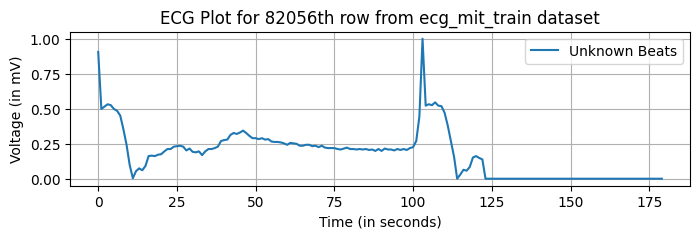

In [104]:
sample_and_plot(ecg_mit_train)

In [133]:
import numpy as np
import matplotlib.pyplot as plt

def beat_plotter(df, i, ax):
    df_name = [name for name in globals() if globals()[name] is df][0]
    if df_name == "ecg_mit_train":
        type_of_beat = ""
        if df[187][i] == 0:
            type_of_beat = "Non-Ecotic Beats (Normal)"
        elif df[187][i] == 1:
            type_of_beat = "Supraventricular Ectopic Beats"
        elif df[187][i] == 2:
            type_of_beat = "Ventricular Ectopic Beats"
        elif df[187][i] == 3:
            type_of_beat = "Fusion Beats"
        else:
            type_of_beat = "Unknown Beats"
    elif df_name == "ecg_mit_test":
        type_of_beat = ""
        if df[187][i] == 0:
            type_of_beat = "Non-Ecotic Beats (Normal)"
        elif df[187][i] == 1:
            type_of_beat = "Supraventricular Ectopic Beats"
        elif df[187][i] == 2:
            type_of_beat = "Ventricular Ectopic Beats"
        elif df[187][i] == 3:
            type_of_beat = "Fusion Beats"
        else:
            type_of_beat = "Unknown Beats"
    elif df_name == "ecg_ptb_abnormal":
        type_of_beat = "Abnormal Class"
    else:
        type_of_beat = "Normal Class"
    
    ax.plot(df.iloc[i][0:180], label=type_of_beat)
    ax.set_xlabel("Time (in seconds)")
    ax.set_ylabel("Voltage (in mV)")    
    ax.legend(loc='upper right')
    ax.grid(True)
    plt.tight_layout()

def sample_and_plot_subplots(df):
    sampled_indices = []
    
    for label in range(5):
        label_indices = df[df[187] == label].index  
        sampled = np.random.choice(label_indices, size=4, replace=False)  
        sampled_indices.append(sampled)  
    
    fig, axes = plt.subplots(5, 4, figsize=(25, 15)) 
    plt.subplots_adjust(hspace=0.5, wspace=0.5)  

    
    for row, label_samples in enumerate(sampled_indices): 
        for col, i in enumerate(label_samples):  
            ax = axes[row, col]  
            beat_plotter(df, i, ax)  
    plt.tight_layout()
    plt.show()

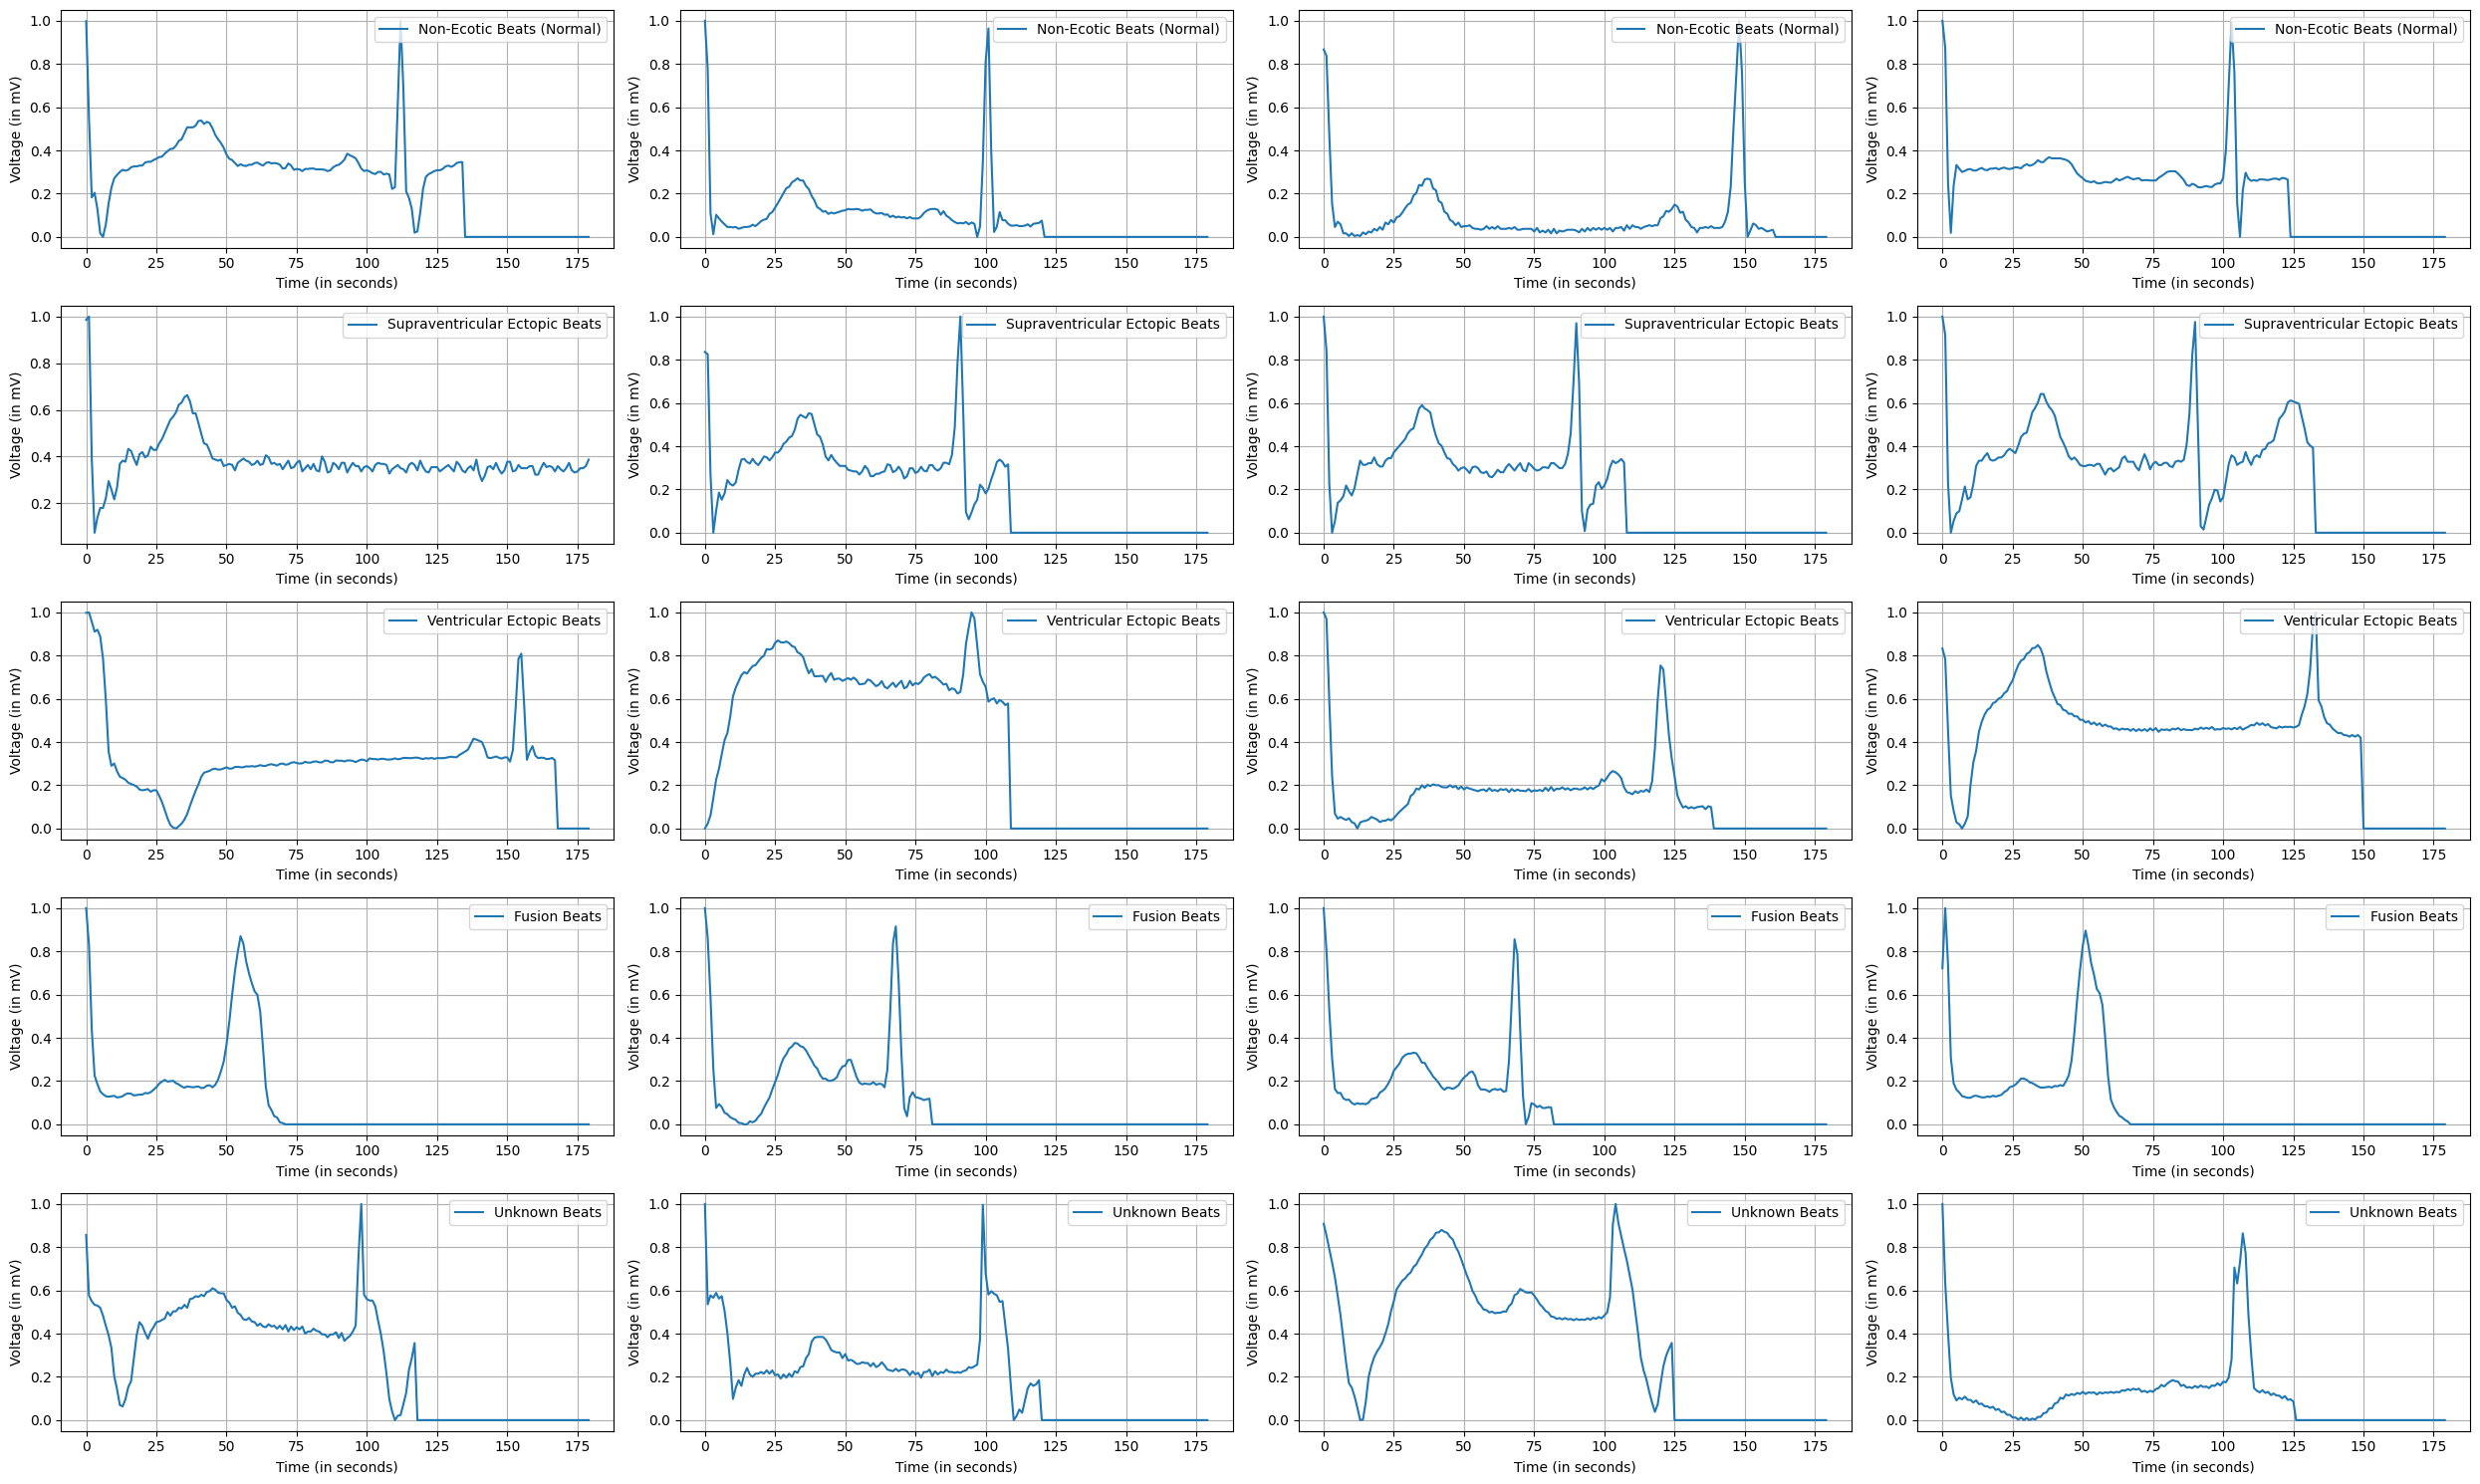

In [134]:
sample_and_plot_subplots(ecg_mit_train)

In [157]:
ecg_mit_train.iloc[:, :187]

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler


X_train, y_train = ecg_mit_train.iloc[:, :187], ecg_mit_train.iloc[:, 187]
X_test, y_test = ecg_mit_test.iloc[:, :187], ecg_mit_test.iloc[:, 187]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def create_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(64, activation='relu')(input_layer)
    encoded = Dense(32, activation='relu')(encoded)
    
    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)
    
    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)  
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

In [173]:
X_train_encoded.shape[1]

160

In [174]:
autoencoders = {}
encoders = {}

label_sets = [
    [0],      
    [0, 1],   
    [0, 2],   
    [0, 3],   
    [0, 4]    
]

for label_set, name in zip(label_sets, ["M1", "M2", "M3", "M4", "M5"]):
    
    X_subset = X_train_scaled[np.isin(y_train, label_set)]
    
    autoenc, encoder = create_autoencoder(input_dim=187)
    autoenc.fit(X_subset, X_subset, epochs=50, batch_size=128, shuffle=True, verbose=1)
    
    autoencoders[name] = autoenc
    encoders[name] = encoder

X_train_encoded = np.hstack([encoders[m].predict(X_train_scaled) for m in ["M1", "M2", "M3", "M4", "M5"]])
X_test_encoded = np.hstack([encoders[m].predict(X_test_scaled) for m in ["M1", "M2", "M3", "M4", "M5"]])

classifier = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(160,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')  
])

classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier.fit(X_train_encoded, y_train, epochs=50, batch_size=128, validation_data=(X_test_encoded, y_test), verbose=1)

Epoch 1/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7379
Epoch 2/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5598
Epoch 3/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5550
Epoch 4/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5521
Epoch 5/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5458
Epoch 6/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5430
Epoch 7/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5447
Epoch 8/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5444
Epoch 9/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5445
Epoch 10/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5442
Epoch 11/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5413
Epoch 12/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5394
Epoch 13/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5446
Epoch 14/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5438
Epoch 15/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

C:\Users\Roy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8981 - loss: 0.4040 - val_accuracy: 0.9388 - val_loss: 0.2120
Epoch 2/50
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9500 - loss: 0.1792 - val_accuracy: 0.9552 - val_loss: 0.1660
Epoch 3/50
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9582 - loss: 0.1484 - val_accuracy: 0.9582 - val_loss: 0.1499
Epoch 4/50
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9640 - loss: 0.1298 - val_accuracy: 0.9640 - val_loss: 0.1349
Epoch 5/50
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9650 - loss: 0.1243 - val_accuracy: 0.9641 - val_loss: 0.1281
Epoch 6/50
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9672 - loss: 0.1154 - val_accuracy: 0.9614 - val_loss: 0.1389
Epoch 7/50
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9682 - loss: 0.1105 - val_accuracy: 0.9684 - val_loss: 0.1147
Epoch 8/50
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9709 - loss: 0.1012 - val_accuracy: 0.9694 - val_

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


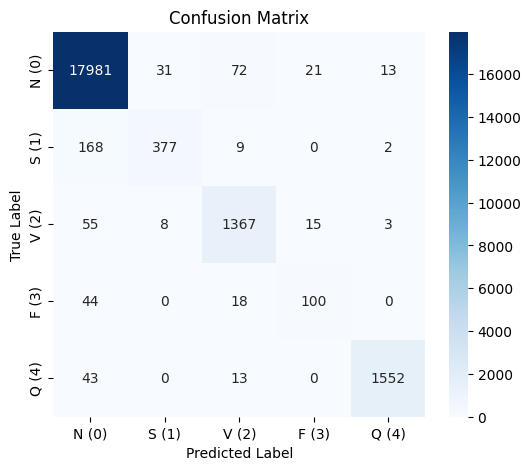

Classification Report:
              precision    recall  f1-score   support

       N (0)       0.98      0.99      0.99     18118
       S (1)       0.91      0.68      0.78       556
       V (2)       0.92      0.94      0.93      1448
       F (3)       0.74      0.62      0.67       162
       Q (4)       0.99      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.91      0.84      0.87     21892
weighted avg       0.98      0.98      0.98     21892



In [175]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_probs = classifier.predict(X_test_encoded)  
y_pred = np.argmax(y_pred_probs, axis=1)  

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["N (0)", "S (1)", "V (2)", "F (3)", "Q (4)"],
            yticklabels=["N (0)", "S (1)", "V (2)", "F (3)", "Q (4)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["N (0)", "S (1)", "V (2)", "F (3)", "Q (4)"]))

### High overall test accuracy but low precision, recall and f1-score for some classes

In [176]:
ecg_mit_test[187].value_counts()

187
0    18118
4     1608
2     1448
1      556
3      162
Name: count, dtype: int64

In [177]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9765
Precision: 0.9758
Recall: 0.9765
F1-Score: 0.9756


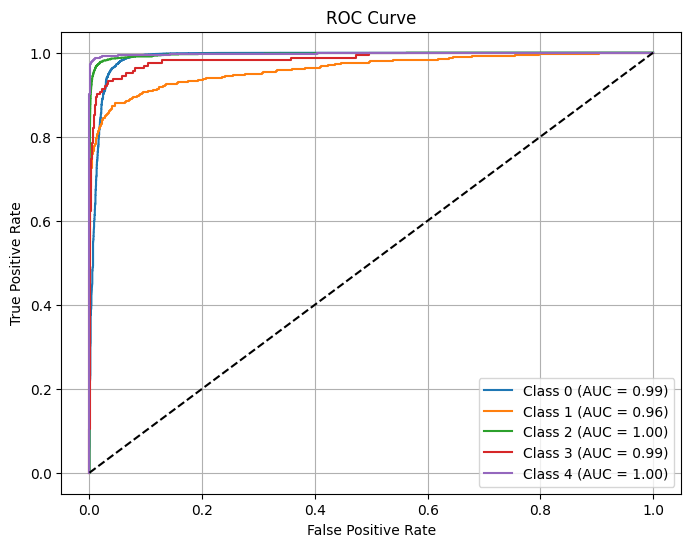

In [178]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--") 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


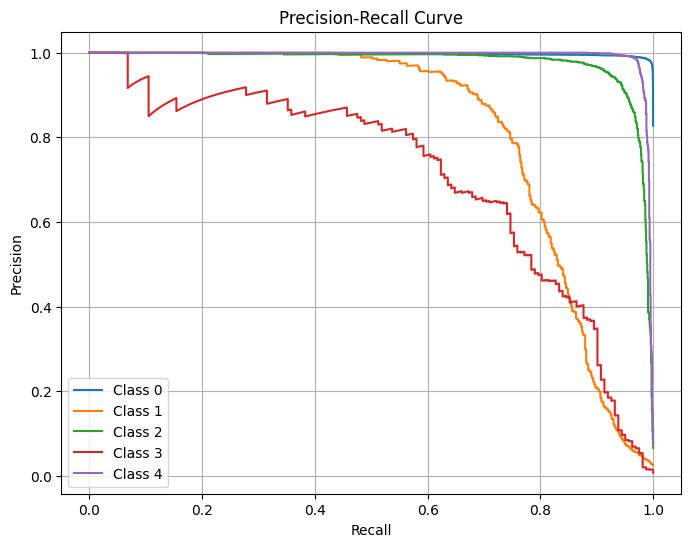

In [179]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f"Class {i}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


In [180]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")

Cohen's Kappa Score: 0.9211


In [181]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Matthews Correlation Coefficient (MCC): 0.9215


In [182]:
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
for i, acc in enumerate(class_accuracies):
    print(f"Accuracy for Class {i}: {acc:.2%}")

Accuracy for Class 0: 99.24%
Accuracy for Class 1: 67.81%
Accuracy for Class 2: 94.41%
Accuracy for Class 3: 61.73%
Accuracy for Class 4: 96.52%


In [183]:
from sklearn.metrics import log_loss

loss = log_loss(y_test, y_pred_probs)
print(f"Log Loss: {loss:.4f}")

Log Loss: 0.0980
